<a href="https://colab.research.google.com/github/Nancy-Shi/Complex_Networks/blob/main/062023_SIS_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import random
import numpy as np
import math as math
from math import log

In [2]:
def generate_degree_sequence(n, gamma, kmin):
    # Generate a random set from the power law distribution
    u = np.random.uniform(size=n)
    degrees = np.ceil((1.0 - u) ** (-1.0 / (gamma - 1.0)))

    # Adjust degrees based on the minimum and maximum degree values
    kmax = int(np.sqrt(n)) # max degree allowed is square root of n
    degrees = degrees[(degrees >= kmin) & (degrees <= kmax)].astype(int)

    # Truncate or pad the sequence to match the length specified
    if len(degrees) >= n:
        degrees = degrees[:n]
    else:
        degrees = np.concatenate((degrees, np.full(n - len(degrees), kmin)))

    return degrees.tolist()

In [3]:
def generate_configuration_model(degree_sequence):
    # Create an empty graph and sum up the degrees
    G = nx.Graph()
    degree_sum = sum(degree_sequence)

    # Print error message if the sum is odd
    if degree_sum % 2 != 0:
        raise ValueError("Degree sum is odd")

    # Create a list of nodes based on the degree sequence
    nodes = []
    for node, degree in enumerate(degree_sequence):
        nodes.extend([node] * degree)

    # Shuffle the nodes list
    random.shuffle(nodes)

    # Track visited edges
    existing_edges = set()

    # Pair the nodes and add edges to the graph
    for i in range(0, len(nodes), 2):
        node1 = nodes[i]
        node2 = nodes[i + 1]

        # Check for self-edges and duplicate edges
        if node1 != node2 and (node1, node2) not in existing_edges:
            G.add_edge(node1, node2)
            existing_edges.add((node1, node2))
            existing_edges.add((node2, node1))

    return G

In [4]:
def color_graph_nodes(states, G):
    susceptible_nodes = [node for node, state in states.items() if state == 0]
    infected_nodes = [node for node, state in states.items() if state == 1]
    node_colors = ['green' if node in susceptible_nodes else 'red' for node in G.nodes()]
    nx.draw(G, node_size=15, edge_color="grey", width=1, with_labels=False, node_color=node_colors)
    plt.show()

In [79]:
def OGA_SIS(graph, mu, lam, max_time, frac_inf):
    N = graph.number_of_nodes()
    degrees = dict(graph.degree())
    kmax = max(degrees.values())

    inf = [None]*N
    states = {j: 0 for j in graph.nodes()}  # Initialize all nodes as susceptible

    # initialize with given fraction of infected individuals
    N_inf = int(N * frac_inf)
    inf = random.sample(graph.nodes(), N_inf)
    states = {i: 1 if i in inf else 0 for i in graph.nodes()}
    # infected edges
    N_e = sum(degrees[j] for j in inf)

    t = 0
    tau = 0

    while N_inf > 0 and t <= max_time:
            # total rate
            R = mu * N_inf + lam * N_e
            if R == 0:
                break

            # randomly select time step
            tau = -np.log(np.random.uniform(1e-6, 1)) / R
            # update time
            t += tau

            # probability of recovery
            p = (mu * N_inf) / R
            # recover if random number less than p
            if np.random.uniform() < p:
                index = np.random.randint(0, N_inf)
                node = inf[index]
                N_inf -= 1         # remove it from the number of infected
                N_e -= degrees[node]   # update the number of links connecting to infected
                inf[index] = inf[N_inf]
                states[node] = 0   # update the disease status
            # try to infect otherwise
            else:
                while True:
                    index = np.random.randint(0, N_inf)
                    node = inf[index]
                    if np.random.uniform() < degrees[node] / kmax:
                        break

                # infect a neighbor
                node = np.random.choice(list(graph.neighbors(node)))
                # If it is not a phantom process, infect the chosen neighbor
                if states[node] == 0:
                    states[node] = 1    # update the disease status
                    N_inf += 1           # add it to the number of infected
                    N_e += degrees[node]  # update the number of links connecting to infected
                    inf.append(node)  # add the node to the infected nodes

    return states, graph

[3, 5, 4, 3, 10, 6, 6, 7, 3, 4, 3, 3, 3, 3, 3, 3, 3, 15, 3, 3, 3, 5, 4, 3, 9, 3, 4, 8, 4, 3, 3, 4, 3, 14, 3, 6, 5, 3, 4, 4, 3, 3, 6, 5, 3, 3, 3, 3, 3, 3, 3, 11, 4, 4, 7, 4, 3, 4, 5, 26, 3, 5, 3, 3, 3, 3, 3, 5, 4, 5, 15, 3, 3, 4, 3, 3, 3, 3, 3, 4, 3, 5, 3, 7, 3, 3, 3, 3, 3, 4, 3, 4, 14, 3, 5, 3, 3, 3, 4, 3, 3, 3, 3, 4, 3, 3, 3, 8, 3, 3, 3, 5, 4, 3, 3, 15, 3, 4, 5, 6, 6, 3, 7, 5, 9, 14, 3, 4, 3, 3, 3, 7, 4, 3, 3, 4, 4, 3, 4, 3, 5, 5, 3, 4, 3, 3, 27, 4, 3, 3, 3, 3, 4, 3, 4, 3, 3, 6, 5, 3, 3, 10, 5, 4, 4, 3, 4, 3, 3, 3, 3, 3, 5, 4, 3, 9, 13, 3, 5, 3, 15, 3, 3, 6, 3, 3, 5, 3, 8, 3, 3, 6, 9, 9, 7, 4, 3, 3, 3, 3, 3, 5, 3, 4, 5, 5, 3, 3, 6, 6, 3, 3, 4, 4, 18, 3, 3, 3, 4, 7, 4, 3, 4, 4, 3, 3, 3, 3, 3, 4, 3, 4, 3, 5, 14, 4, 3, 3, 4, 4, 3, 3, 3, 3, 3, 3, 4, 14, 3, 3, 20, 3, 13, 5, 5, 4, 4, 3, 3, 3, 3, 6, 3, 6, 5, 6, 4, 3, 3, 3, 22, 3, 4, 4, 3, 3, 3, 10, 8, 7, 3, 3, 29, 5, 4, 3, 3, 3, 4, 5, 3, 3, 4, 3, 5, 3, 3, 3, 5, 3, 3, 3, 3, 7, 3, 3, 3, 3, 3, 10, 5, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,

<ipython-input-79-72bbc13f3bf9>:11: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  inf = random.sample(graph.nodes(), N_inf)


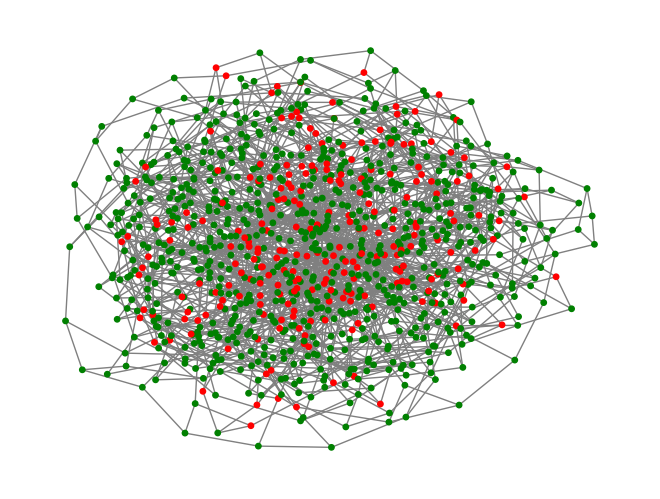

In [82]:
# Test
import sys

fnOutput = sys.argv[1]

n = 1000
gamma = 2.7
kmin = 3

degrees = generate_degree_sequence(n, gamma, kmin)
print(degrees)

# Test configuration model
G = generate_configuration_model(degrees)

# Plot the graph
#plt.figure(figsize=(8, 6))
#pos = nx.spring_layout(G, seed=42)
#nx.draw(G, pos, node_size=30, node_color="green", with_labels=False, edge_color="gray", alpha=0.7)
#plt.title("Configuration Model Graph")
#plt.show()

states, G2 = OGA_SIS(G, 0.2, 0.15, 100000, 0.03)
color_graph_nodes(states, G2)